# Data Visualization with Python - Python Firenze Meetup 

06/02/2020 - Giacomo Debidda @Python Firenze (Meetup)

Repo: http://bit.ly/pyfirenze-dataviz

## Table of Contents <a name="toc"></a>

- [Intro](#intro)
- [Fundamentals](#fundamentals)
- [Chartjunk](#chartjunk)
- [Visual Perception](#visual-perception)
- [Where to find the data?](#find-the-data)
- [Exploratory Data Analysis](#eda)
- [Line chart](#line-chart)
- [Tidy data](#tidy-data)
- [Grammar Of Graphics](#grammar-of-graphics)
- [Bar chart](#bar-chart)
- [Scatter plot](#scatterplot)
- [Box plot & Violin plot](#box-plot)
- [Histogram](#histogram)
- [Just use SQL](#sql)
- [Geospatial](#geospatial)

In [31]:
import numpy as np
import pandas as pd

np.__version__, pd.__version__

('1.18.1', '0.25.3')

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

mpl.__version__, sns.__version__, alt.__version__

('3.1.3', '0.9.0', '4.0.1')

In [33]:
np.set_printoptions(precision=2, suppress=True)
pd.options.display.max_rows = 10
pd.options.display.max_columns = 20

In [34]:
import inspect

def public_modules(py_lib):    
    return [tup[0] for tup in inspect.getmembers(py_lib, inspect.ismodule) if tup[0][0] != '_']
    
def public_functions(py_lib):
    return [tup[0] for tup in inspect.getmembers(py_lib, inspect.isfunction) if tup[0][0] != '_']

def reset_aesthetics():
    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(style=None)

## Intro <a name="intro"></a>

[↑ Back to TOC](#toc)

Data visualization involves producing images where information is **encoded** as visual objects. These **visual marks** communicate relationships among the **represented data** to the **viewers** of those images.

> Bad data + Good visualization = Bad chart<sup>[1](#footnote-1)</sup>.

Processing, analyzing and communicating this data presents **ethical** and **analytical** challenges to the data visualization practitioner. The goal is to communicate information **clearly** and **efficiently** to users.

> Excellence in statistical graphics consists of complex ideas communicated with clarity, precision and efficiency<sup>[2](#footnote-2)</sup>.

Data visualization is a multi-disciplinary field that involves a broad range of topics:

- Data analysis
- UX
- Typography
- Psychology

Clearly no one can hope to master all of these fields, so it's better to think about a spectrum of these qualities. Each data visualization practictioner is stronger in some fields and weaker in other ones. Read [The 7 Kinds of Data Visualization People](https://medium.com/nightingale/the-7-kinds-of-data-visualization-people-9964e80443a7) by Elijah Meek, [Becoming a Data Visualization Practitioner](https://vallandingham.me/becoming_datavis_practitioner.html) by Jim Vallandingham, and finally, [what is a senior data visualization engineer](https://medium.com/@Elijah_Meeks/what-is-a-senior-data-visualization-engineer-eb032996297) by Elijah Meek:

- Technically, you need to be able to reproduce any chart you see.
- Theoretically, you need to be able to understand the fundamental principles of visual display of information. You need to know the most effective ways to encode information into graphics.
- Practically, you need to think of yourself as a designer first. Finding out what your readers want. This touches on interaction design, information design and graphic design. That's a lot of design.

> Focus on your audience, not (just) the question.

I think one could draw a comparison between a good data visualization and [Dieter Rams' 10 principles of good design](https://readymag.com/shuffle/dieter-rams/), in particular the number 2, 4 and 6:

2. Good design makes a product useful. A dataviz make the data (i.e. the product) useful.
4. Good design makes a product understandable. A good dataviz makes the data understandable. And so, actionable.
6. Good design is honest. A good dataviz does not lie to the viewer, nor deceives him.

We can also draw a comparison with the world of UX. A data visualization should be an [honest interface](https://52weeksofux.com/post/475093156/honest-interfaces). In this case, the visuals are an interface for the data.

<a name="footnote-1">1</a>: Wong, Dona M. (2010). <em>The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures.</em>

<a name="footnote-2">2</a>: Tufte, Edward R. (1983). <em>The Visual Display of Quantitative Information.</em>

## Fundamentals <a name="fundamentals"></a>

[↑ Back to TOC](#toc)

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/visual-display-of-quantitative-information.jpeg" alt="Edward R. Tufte, The Visual Display of Quantitative Information." title="Edward R. Tufte, The Visual Display of Quantitative Information." width="400" />|
|:--:|
| *Edward R. Tufte, The Visual Display of Quantitative Information* |

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/guide-to-information-graphics.jpeg" alt="Dona M. Wong, The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures." title="Dona M. Wong, The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures." width="400" />|
|:--:|
| *Dona M. Wong, The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures.* |

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/functional-art.jpeg" alt="Alberto Cairo, The Functional Art" title="Alberto Cairo, The Functional Art" width="400" />|
|:--:|
| *Alberto Cairo, The Functional Art* |

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/visual-thinking.jpg" alt="Rudolf Arnheim, Visual Thinking" title="Rudolf Arnheim, Visual Thinking" width="400" />|
|:--:|
| *Rudolf Arnheim, Visual Thinking* |

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/universal-principles-of-design.png" alt="William Lidwell, Kritina Holden, Jill Butler, Universal Principles of Design" title="William Lidwell, Kritina Holden, Jill Butler, Universal Principles of Design" width="400" />|
|:--:|
| *William Lidwell, Kritina Holden, Jill Butler, Universal Principles of Design* |

### Gestalt Laws of Perceptual Organization

We need to keep in mind human **perception** and **cognition** when we design a data visualization: 2/3 of the brain's neurons can be involved in visual processing.

Gestalt psychology focuses on how people interpret the world. Here are the [Laws of Gestalt](https://www.verywellmind.com/gestalt-laws-of-perceptual-organization-2795835):

1. The Law of Similarity
2. The Law of Pragnanz
3. The Law of Proximity
4. The Law of Continuity
5. The Law of Closure
6. The Law of Common Region

|<img src="https://www.verywellmind.com/thmb/d7iSZvK2l2045uSOM2kuuQuOZBM=/700x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/gestalt-laws-of-perceptual-organization-2795835-01-8f488f3d191048a0bc42e23ff9470042.png" alt="Gestalt Laws of Perceptual Organization" title="Gestalt Laws of Perceptual Organization" width="600" />|
|:--:|
| *Gestalt Laws of Perceptual Organization* |

Humans can distinguish differences in line length, shape, orientation, and color (hue) readily without significant processing effort; these are referred to as **"pre-attentive attributes"**.

See also this article on the [Gestalt Theory of Visual Perception](http://www.users.totalise.co.uk/~kbroom/Lectures/gestalt.htm).

### Isotypes

Otto Neurath's [Vienna Method of Pictorial Statistics](https://en.wikipedia.org/wiki/Isotype_(picture_language)) (Wiener Methode der Bildstatistik) was the first set of standardized and abstracted pictorial symbols to represent social-scientific data. It also prescribed specific guidelines on how to combine the identical figures using serial repetition.

|<img src="https://i.pinimg.com/originals/3e/11/78/3e117810189374383e293f34fda15296.jpg" alt="Isotypes" title="Isotypes" width="600" />|
|:--:|
| *Isotypes* |

### Modern UX

Some of these concepts are also described in the [Laws of UX](https://lawsofux.com/). If your data visualization has to respond to user interactions, don't forget [Fitts' Law](https://www.interaction-design.org/literature/topics/fitts-law).

There are 6 design fundamentals:

1. color & contrast
2. white space
3. visual hierarchy
4. complexity vs simplicity
5. consistency
6. scale

### How to pick the right chart?

- [From Data to Viz](https://www.data-to-viz.com/)
- [The Python Graph Gallery](https://python-graph-gallery.com/)
- [Top 10 dataviz caveats](https://www.data-to-viz.com/caveats.html)

## Chartjunk <a name="chartjunk"></a>

[↑ Back to TOC](#toc)

Chartjunk: all visual elements in charts and graphs that are not necessary to comprehend the information represented on the graph, or that distract the viewer from this information.<sup>[3](#footnote-3)</sup>

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/chartjunk.png" alt="Chartjunk" title="Chartjunk" width="600" />|
|:--:|
|*Chartjunk*|

You can find plenty of examples of chartjunk here:

- [junkcharts](https://junkcharts.typepad.com/junk_charts/2014/08/welcome.html) (for example, read [this one](https://junkcharts.typepad.com/junk_charts/2019/12/this-excel-chart-looks-standard-but-gets-everything-wrong.html)).
- [WTF Visualizations](https://viz.wtf/)

<a name="footnote-3">3</a>: Tufte, Edward R. (1983). The Visual Display of Quantitative Information.

## Visual Perception <a name="visual-perception"></a>

[↑ Back to TOC](#toc)

### Colors

- [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map)
- [Rainbow Colormaps – What are they good for? Absolutely nothing!](http://medvis.org/2012/08/21/rainbow-colormaps-what-are-they-good-for-absolutely-nothing/)
- [How Bad Is Your Colormap? (Or, Why People Hate Jet – and You Should Too)](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- [Color blindness simulator](http://colororacle.org/usage.html)
- [Contrast Ratio](https://contrast-ratio.com/#black-on-white) by [Lea Verou](http://lea.verou.me/).

Color schemes can be:

- sequential
- diverging
- qualitative

|<img src="https://static.observableusercontent.com/thumbnail/c680595bf8b26e4cb6bf2306c222a2ba9146f41dc0549c54e0b709a57d94cc87.jpg" alt="d3-scale-chromatic" title="d3-scale-chromatic" width="800" />|
|:--:|
| *Color schemes, ready for copy & paste* |

| [![A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt](https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/colormap-1.png)](https://youtu.be/xAoljeRJ3lU "A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt") |
|:--:|
| *A Better Default Colormap for Matplotlib (SciPy 2015), by Nathaniel Smith and Stéfan van der Walt* |

A tool that can help you in picking a good color scheme is [Color Brewer 2.0](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3), by [Cynthia Brewer](http://www.personal.psu.edu/cab38/) and [axismaps](https://www.axismaps.com/).

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/color-brewer.png" alt="d3-scale-chromatic" title="Color Brewer 2.0" width="800" />|
|:--:|
| *Color Brewer 2.0* |

### Typography

[Legibility and Readability in Typographic Design](https://vanseodesign.com/web-design/legible-readable-typography/).

### Perceiving patterns where there are none

Complex visualizations containing lots of elements might even cause the viewer to experience [apophenia](https://en.wikipedia.org/wiki/Apophenia) (the tendency to mistakenly perceive connections and meaning between unrelated things).

## Where to find the data? <a name="find-the-data"></a>

[↑ Back to TOC](#toc)

Before creating a visualization you will need to find some data, ~~analyze it~~, clean it, then analyze it.

### Communities

- [Open Data on Stack Exchange](https://opendata.stackexchange.com/)
- [r/datasets subreddit](https://www.reddit.com/r/datasets/)

### Datasets

- [real-time, streaming data](https://www.quora.com/Where-can-I-find-public-or-free-real-time-or-streaming-data-sources)
- [GIS data](https://freegisdata.rtwilson.com/)
- [Open data Regione Toscana](http://dati.toscana.it/dataset)
- [Geoblog Regione Toscana](http://geoblog.regione.toscana.it/)
- [kaggle](https://www.kaggle.com/)
- [OpenStreetMap](https://www.openstreetmap.org/)
- [R datasets](https://vincentarelbundock.github.io/Rdatasets/datasets.html)
- [Quandl](https://www.quandl.com/)
- [Open Data on AWS](https://registry.opendata.aws/)
- [GeoDa University of Chicago](https://geodacenter.github.io/data-and-lab//)
- [World Bank Open Data](https://data.worldbank.org/)
- [Stanford large network dataset collection](http://snap.stanford.edu/data/)
- [NYC Open Data](https://opendata.cityofnewyork.us/)
- [Pro Publica](https://www.propublica.org/datastore/)
- [Academic Torrents](https://academictorrents.com/)
- [Data.Gov](https://www.data.gov/)
- [UCI Machine Learning Repository](http://mlr.cs.umass.edu/ml/)
- [Open Data Socrata](https://opendata.socrata.com/)
- [World Health Organization](http://apps.who.int/gho/data/node.home)
- [Unicef](https://data.unicef.org/resources/resource-type/datasets/)
- [Yelp Open Dataset](https://www.yelp.com/dataset)
- [DBpedia](https://wiki.dbpedia.org/develop/datasets)
- [United State Census Bureau](https://www.census.gov/data.html)
- [FiveThirtyEight](https://data.fivethirtyeight.com/)
- [EU Open Data portal](https://data.europa.eu/euodp/en/data/)
- [SQLite Data Starter Packs](http://2016.padjo.org/tutorials/sqlite-data-starterpacks/)
- [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)
- etc...

### Synthetic Data

If you want to practice data visualization without real data you could also create some syntehtic data. There are python libraries for that too, for example [faker](https://github.com/joke2k/faker/) and [mimesis](https://github.com/lk-geimfari/mimesis).

Or you might want to create a visualization of a dataset which contain sensitive information. If that's the case, anonymize the data. See [this tutorial](https://github.com/theodi/synthetic-data-tutorial).

### Remember

Real world data can be messy!

- 80% Data wrangling (aka data munging, data jujitsu)
- 20% data visualization

### The easy route

Today we are going to use [PyDataset](https://github.com/iamaziz/PyDataset), which comes with 750+ datasets.

In [35]:
from pydataset import data

In [36]:
data('JohnsonJohnson', show_doc=True)

JohnsonJohnson

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Quarterly Earnings per Johnson & Johnson Share

### Description

Quarterly earnings (dollars) per Johnson & Johnson share 1960–80.

### Usage

    JohnsonJohnson

### Format

A quarterly time series

### Source

Shumway, R. H. and Stoffer, D. S. (2000) _Time Series Analysis and its
Applications_. Second Edition. Springer. Example 1.1.

### Examples

    require(stats); require(graphics)
    JJ <- log10(JohnsonJohnson)
    plot(JJ)
    ## This example gives a possible-non-convergence warning on some
    ## platforms, but does seem to converge on x86 Linux and Windows.
    (fit <- StructTS(JJ, type = "BSM"))
    tsdiag(fit)
    sm <- tsSmooth(fit)
    plot(cbind(JJ, sm[, 1], sm[, 3]-0.5), plot.type = "single",
         col = c("black", "green", "blue"))
    abline(h = -0.5, col = "grey60")
    monthplot(fit)




## Exploratory Data Analysis (EDA) <a name="eda"></a>

[Back to TOC](#toc)

Before visualizing the data we almost always need to clean it in some way (to wrangle it as they say). The best tool to do that in Python is the Pandas library. 

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/python-for-data-analysis.jpeg" alt="Wes McKinney, Python for Data Analysis" title="Wes McKinney, Python for Data Analysis" width="400" />|
|:--:|
| *Wes McKinney, Python for Data Analysis* |

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/effective-pandas.jpeg" alt="Tom Augspurger, Effective Pandas" title="Tom Augspurger, Effective Pandas" width="400" />|
|:--:|
| *Tom Augspurger, Effective Pandas* |

In [11]:
# Quarterly Earnings per Johnson & Johnson Share, 1960-1980
df = data('JohnsonJohnson')

In [12]:
df.shape

(84, 2)

In [13]:
df.head()

time  JohnsonJohnson
1  1960.00            0.71
2  1960.25            0.63
3  1960.50            0.85
4  1960.75            0.44
5  1961.00            0.61

In [14]:
df.tail()

time  JohnsonJohnson
80  1979.75            9.99
81  1980.00           16.20
82  1980.25           14.67
83  1980.50           16.02
84  1980.75           11.61

In [15]:
df.sample(3)

time  JohnsonJohnson
41  1970.00            2.79
54  1973.25            5.85
27  1966.50            1.86

In [16]:
df.dtypes

time              float64
JohnsonJohnson    float64
dtype: object

In [17]:
df.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
           dtype='int64')

In [18]:
df.describe()

time  JohnsonJohnson
count    84.000000       84.000000
mean   1970.375000        4.799762
std       6.098155        4.309991
min    1960.000000        0.440000
25%    1965.187500        1.247500
50%    1970.375000        3.510000
75%    1975.562500        7.132500
max    1980.750000       16.200000

In [19]:
df.isnull().sum()

time              0
JohnsonJohnson    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
# duplicated considers the entire row
# ?df.duplicated

people = [
    ('Jack', 25),
    ('Jack', 30),
    ('John', 20),
    ('John', 20),
]
 
df_people = pd.DataFrame(people, columns=['Name', 'Age'])
df_people.duplicated()

0    False
1    False
2    False
3     True
dtype: bool

## Types of variables: quantitative, qualitative, discrete, etc - delivering the message

We can distinguish between 8 types of quantitative messages:

1. time-series
2. ranking
3. part-to-whole
4. deviation
5. frequencey distribution
6. correlation
7. nominal comparison
8. geospatial

https://python-graph-gallery.com/

In [22]:
from pandas_profiling import ProfileReport

profile = ProfileReport(
    df,
    # minimal=True,
    html={'style': {'full_width': True}},
    title='Quarterly Earnings per Johnson & Johnson Share, 1960-1980',
)

# profile.to_file(output_file="my_report.html")

profile

Other tasks related to exploratory data analysis:

- outlier detection
- date parsing
- missing value imputation (*aka* NaN imputation. For example, mean/median substitution, [MICE](https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779), etc).

## Line chart <a name="line-chart"></a>

[Back to TOC](#toc)

A [line chart](https://www.data-to-viz.com/#line) (aka line graph, line plot) displays the **evolution** (trend) of one or several **numeric** variables. Its purpose is to visualize a trend over time.

When several values are available for each time stamp, data can be aggregated and a confidence zone can be drawn.

### Tips

- appropriate baseline for the data
- line width: not too thin, not too thick
- thin gridlines, with the zero baseline slightly thicker
- line range on y axis: roughly 2/3 of the chart area
- color to highlight the negative area of the chart
- no spaghetti lines: 4 or fewer lines. If you have more, use a panel of charts (facet grid)
- darker color for the most important line
- 1 color for the most important line, 1 color with lighter shades for all other lines
- direct labeling is better than a legend
- almost never use a double y-axis

In [176]:
# Quarterly Earnings per Johnson & Johnson Share, 1960-1980
df = data('JohnsonJohnson')
df.head()

time  JohnsonJohnson
1  1960.00            0.71
2  1960.25            0.63
3  1960.50            0.85
4  1960.75            0.44
5  1961.00            0.61

In [177]:
# Use ? to read the docstring

# ?pd.date_range

In [178]:
datetime_index = pd.date_range(
    start='1960-01',
    end='1980-12',
    freq='BQS', # Business Quarter Start frequency
    # tz='America/New_York',
    name='date',
)

df['date'] = pd.Series(datetime_index)

df = df.drop(columns=['time'])

df.head()

JohnsonJohnson       date
1            0.71 1960-04-01
2            0.63 1960-07-01
3            0.85 1960-10-03
4            0.44 1961-01-02
5            0.61 1961-04-03

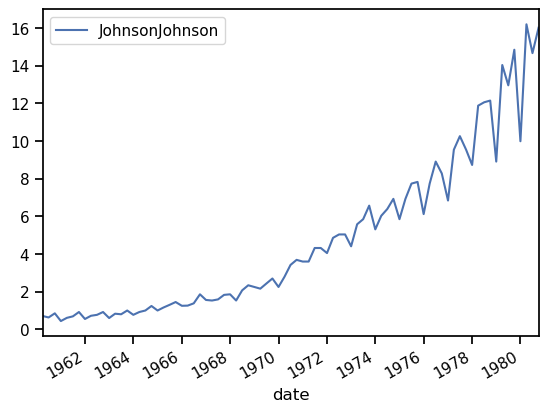

In [179]:
reset_aesthetics()

df.plot(x='date', y='JohnsonJohnson')
plt.show()

In [180]:
# ?sns.lineplot

In [183]:
reset_aesthetics()

sns.lineplot(
    x='date',
    y='JohnsonJohnson',
    data=df,
);

In [184]:
# ?alt.Chart

In [193]:
reset_aesthetics()

alt.Chart(df).mark_line().encode(
    x=alt.X('date', title=''),
    y='JohnsonJohnson',
).properties(
  width=600,
  height=400
).configure_axis(
    labelFontSize=14,
    titleFontSize=18,
)

alt.Chart(...)

Pandas' `plot()` method on `Series` and `DataFrame` is just a simple wrapper around `matplotlib.pyplot.plot()`.

You will need to know Matplotlib to fully customize your charts.

In [197]:
reset_aesthetics()

# Make the chart bigger
fig = plt.figure(figsize=(10, 4))

ax = df.plot(
    x='date',
    y='JohnsonJohnson',
    
    # A title puts the chart into context.
    title='Quarterly Earnings in USD per Johnson & Johnson Share, 1960-1980',
    
    # No need to use colors: there is a single line. Black on white for maximum contrast.
    # https://contrast-ratio.com/#black-on-white
    color='k',
    
    # The title says it all already. The legend would just take up space and distract the viewer.
    legend=False,
    
    # Markers let us see where the data samples are.
    marker='.',
    markeredgecolor='black',
    markerfacecolor='white',
)

ax.set(xlabel='', ylabel='USD')

# Tick lines across the plot to help the viewer trace along the axis ticks.
# Make sure that the lines are light and small so they don't obscure the primary data lines.
ax.grid(True, which='major', axis='y', ls='--', lw=.5, c='k', alpha=.3)

# Tick marks on y axis don't add anything to this chart, so we remove them.
ax.tick_params(
    bottom=True,
    left=False,
)

# Matplotlib would tilt the tick labels by some amount. It's better to leave them at 0 degrees.
# Placing the tick labels can be a bit tedious...
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0, ha="center")

# shave off some margins
plt.tight_layout()

# plt.savefig('./images/Johnson&Johnson_1960-1980.png')

<Figure size 1000x400 with 0 Axes>

In [272]:
# data('macro', show_doc=True)

In [273]:
df = data('macro')
df.sample(3)

country  year  gdp  unem  capmob     trade
45        Canada  1985  4.7  10.5       0  53.52345
338        Japan  1978  5.1   2.2      -1  26.11608
89   Netherlands  1979  2.4   5.6       0  89.75119

### Pandas `plot` limitations

As far as I know, Pandas doesn't allow to plot multi line charts. This will not work as you would expect:

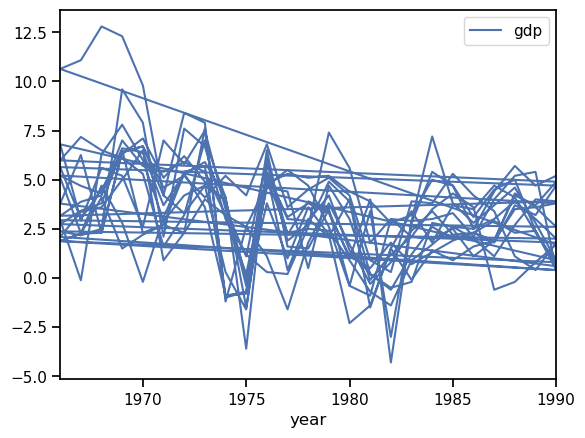

In [274]:
reset_aesthetics()

df.plot(x='year', y='gdp')

plt.show()

### Seaborn

By default, Seaborn aggregates `gdp` and plots a confidence interval.

In [279]:
reset_aesthetics()

sns.lineplot(
    x='year',
    y='gdp',
    data=df,
);

But it can plot multi line charts if we set `hue`.

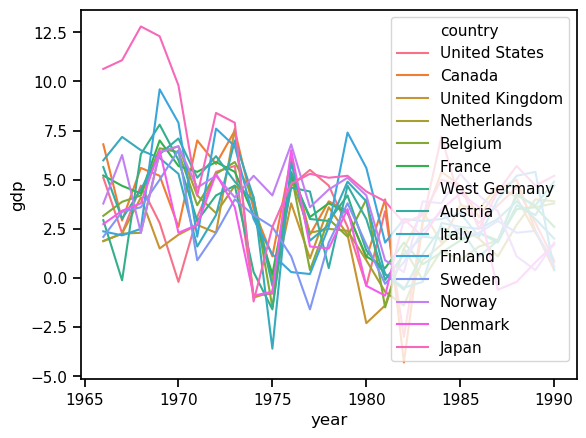

In [280]:
reset_aesthetics()

sns.lineplot(
    x='year',
    y='gdp',
    data=df,
    hue='country'
);

### Altair has better defaults

By default, Altair plots a multi line chart.

In [281]:
reset_aesthetics()

alt.Chart(df).mark_line().encode(
    x='year',
    y='gdp',
    color='country'
)

alt.Chart(...)

But it can plot the mean line and the confidence interval if we layer 2 encodings.

In [282]:
reset_aesthetics()

line = alt.Chart(df).mark_line().encode(
    x='year',
    y='mean(gdp)'
)

band = alt.Chart(df).mark_errorband(extent='ci').encode(
    x='year',
    y=alt.Y('gdp', title='GDP'),
)

alt.layer(band, line)

alt.LayerChart(...)

## Trellis plots and Facet grids

The multi line chart above is totally unreadable. It's a spaghetti plot. Better alternatives are trellis plots and facet grids.

Rule of thumb: plot up to 4 lines in the same chart. If you need more, use a trellis plot or a facet grid.

In [283]:
# New York Air Quality Measurements
# Daily air quality measurements in New York, May to September 1973.

# Ozone: Mean ozone in parts per billion from 13:00 to 15:00 hours at Roosevelt Island
# Solar.R: Solar radiation in Langleys in the frequency band 4000–7700 Angstroms
#          from 0800 to 1200 hours at Central Park
# Wind: Average wind speed in miles per hour at 0700 and 1000 hours at LaGuardia Airport 
# Temp: Maximum daily temperature in degrees Fahrenheit at La Guardia Airport. 
# data('airquality', True)

df = data('airquality')

df.shape

(153, 6)

In [284]:
df.head()

Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
5    NaN      NaN  14.3    56      5    5

In [285]:
datetime_index = pd.date_range(
    start='1973-04-30',
    end='1973-09-30',
    freq='D',
#     tz='America/New_York',
    name='date',
)

df['date'] = pd.Series(datetime_index)

# Altair has some issues with column names with a dot, so we copy the data in a new column.
df['solar_radiation'] = df['Solar.R']

df = df.drop(columns=['Month', 'Day', 'Solar.R'])

df.head()

Ozone  Wind  Temp       date  solar_radiation
1   41.0   7.4    67 1973-05-01            190.0
2   36.0   8.0    72 1973-05-02            118.0
3   12.0  12.6    74 1973-05-03            149.0
4   18.0  11.5    62 1973-05-04            313.0
5    NaN  14.3    56 1973-05-05              NaN

In [286]:
alt.Chart(df).transform_fold(
    fold=['Ozone', 'solar_radiation'],
    as_=['Air Quality Measurement', 'value'],
).mark_line(interpolate='linear').encode(
    x=alt.X('date:T', axis=alt.Axis(title='')),
    y=alt.Y(
        'value:Q',
        axis=alt.Axis(
            title='Ozone (ppb)' if 'Air Quality Measurement' == 'Ozone' else 'Solar radiation (Langleys)',
        ),
    ),
    row=alt.Row('Air Quality Measurement:N'),  
    color=alt.Color('Air Quality Measurement:N')
).configure_axisX(
    grid=False,
    ticks=True,
).properties(
    width=600,
    height=200,
    title='Daily Air Quality Measurements in NYC, May - September 1973'
)

alt.Chart(...)

In [287]:
# Reaction times in a sleep deprivation study

# Reaction: Average reaction time (ms)
# Days: Number of days of sleep deprivation
# Subject: Subject number on which the observation was made
# data('sleepstudy', show_doc=True)

df = data('sleepstudy')
df.shape

(180, 3)

In [288]:
df.head()

Reaction  Days  Subject
1  249.5600     0      308
2  258.7047     1      308
3  250.8006     2      308
4  321.4398     3      308
5  356.8519     4      308

Pandas and Seaborn do not include the zero-point in quantitative axes. This is risky, the baseline should almost always be zero.

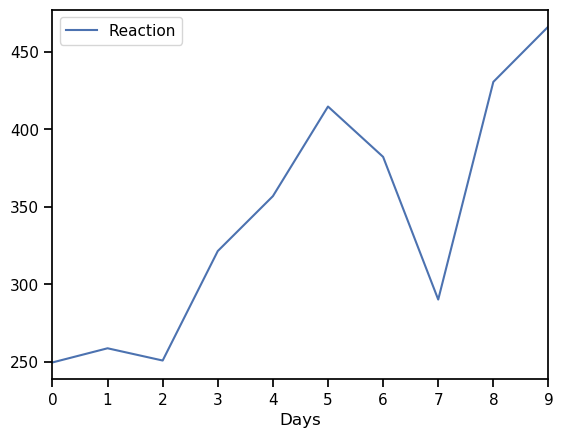

In [290]:
df.loc[df.Subject == 308].plot(x='Days', y='Reaction')

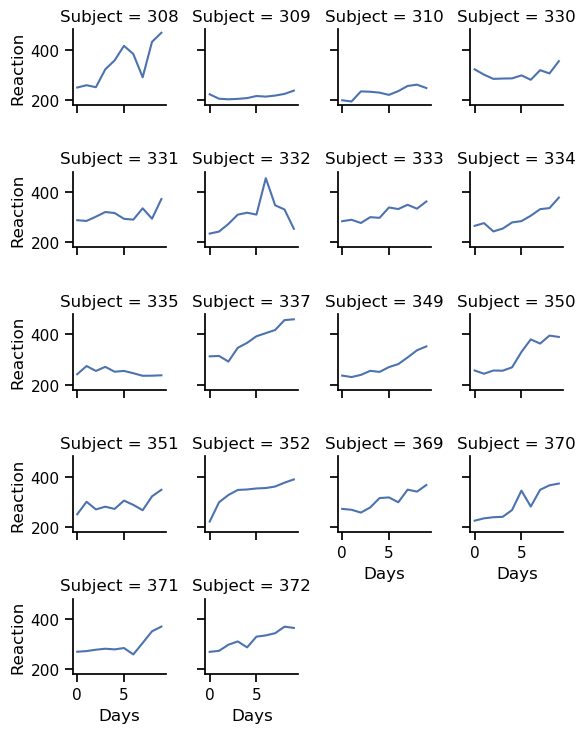

In [297]:
reset_aesthetics()

grid = sns.FacetGrid(df, col='Subject', col_wrap=4, height=1.5)
grid.map(plt.plot, 'Days', 'Reaction')

# grid.savefig('./images/sleep-deprivation-seaborn-facet-grid.png')

Altair inherits from Vega-Lite the convention of always including the zero-point in quantitative axes.

In [298]:
alt.Chart(df).mark_line().encode(
    x=alt.X('Days:O', title=''),
    y=alt.Y(
        'Reaction:Q',
        title='',
#         scale=alt.Scale(zero=False),
#         scale=alt.Scale(domain=(200, 500))
    ),
    facet=alt.Facet('Subject:O', columns=3),
).properties(
    title='Reaction times (ms) for sleep-deprived subjects over 10 days (ms)',
    width=200,
    height=100
)

alt.Chart(...)

Nonetheless, Altair allows us to use a different domain if we specify it. For example, here we can specify a narrower domain to highlight the differences across the 18 subjects.

In [300]:
alt.Chart(df).transform_joinaggregate(
    maxReaction='max(Reaction)',
    groupby=['Subject']
).mark_line().encode(
    x=alt.X('Days:O', title=''),
    y=alt.Y('Reaction:Q', title='', scale=alt.Scale(domain=(200, 450))),
    color=alt.condition(
        alt.datum['maxReaction'] > 400,
        alt.value('orange'),
        alt.value('darkgray')
    ),
    facet=alt.Facet('Subject:O', columns=3, title=''),
).properties(
    title='Reaction times (ms) for sleep-deprived subjects over 10 days',
    width=200,
    height=100
).configure_title(
    fontSize=24,
    color='black'
)

alt.Chart(...)

## Tidy Data <a name="tidy-data"></a>

[↑ Back to TOC](#toc)

The principles for defining tidy data come from relational databases and relational algebra. Tidy data is basically [Codd's 3rd normal form](https://datascience.stackexchange.com/questions/43184/equivalence-of-tidy-data-and-third-normal-form).

According to Hadley Wickham, [tidy data](http://vita.had.co.nz/papers/tidy-data.html)<sup>[4](#footnote-4)</sup> are based on three rules:

1. each variable forms a columns and contains values
2. each observation forms a row
3. each type of observational unit forms a table

Definitions:

- Variable: A measurement or an attribute. Height, weight, sex, etc.
- Value: The actual measurement or attribute. 152 cm, 80 kg, female, etc.
- Observation: All values measure on the same unit. Each person.

5 types of messy data:

1. Column headers are values, not variable names.
2. Multiple variables are stored in one column.
3. Variables are stored in both rows and columns.
4. Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.


Having tidy data is a precondition to use the grammar of graphics.

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/tidy-data.png" alt="Hadley Wickham, Tidy Data" title="Hadley Wickham, Tidy Data" width="400" />|
|:--:|
| *Hadley Wickham, Tidy Data* |

Tidy datasets are datasets in the [long format](https://www.theanalysisfactor.com/wide-and-long-data/). Messy datasets are datasets in the [wide format](https://sejdemyr.github.io/r-tutorials/basics/wide-and-long/).

See also this nice article about [Tidy data in Python](http://www.jeannicholashould.com/tidy-data-in-python.html).

<a name="footnote-4">4</a>: Wickham, Hadley (2010). <em>The Journal of Statistical Software, vol. 59, 2014.</em>

In [156]:
# Violent Crime Rates by US State in 1973 - arrests per 100,000 residents
# data('USArrests', show_doc=True)

In [38]:
df = data('USArrests')
df.shape

(50, 4)

In [39]:
df.head()

Murder  Assault  UrbanPop  Rape
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6

The 50 US states represent the index of this dataset. Nothing wrong with that, but it's annoying when plotting the data with Seaborn, so we create a new column from this index.

In [40]:
df['state'] = df.index
df.head()

Murder  Assault  UrbanPop  Rape       state
Alabama       13.2      236        58  21.2     Alabama
Alaska        10.0      263        48  44.5      Alaska
Arizona        8.1      294        80  31.0     Arizona
Arkansas       8.8      190        50  19.5    Arkansas
California     9.0      276        91  40.6  California

In [41]:
df['percent_of_population_in_urban_areas'] = df.UrbanPop
df_wide = df.drop(columns=['UrbanPop'])

df_wide.loc[df_wide['state'] == 'California']

Murder  Assault  Rape       state  \
California     9.0      276  40.6  California   

            percent_of_population_in_urban_areas  
California                                    91

This is a dataset in the **wide** format, a messy dataset. Column headers `Assault`, `Murder`, `Rape` are values, not variable names.

To clean this dataset we **melt** it. This will create a **molten** dataset which is the **long** format.

In [42]:
df_long = df_wide.melt(
    id_vars=['state', 'percent_of_population_in_urban_areas'],
    value_vars=['Assault', 'Murder', 'Rape'],
    var_name='crime',
    value_name='arrests_per_100k'
)

df_long = df_long.sort_values(by=['state'])

df_long.loc[df_long['state'] == 'California']

state  percent_of_population_in_urban_areas    crime  \
104  California                                    91     Rape   
4    California                                    91  Assault   
54   California                                    91   Murder   

     arrests_per_100k  
104              40.6  
4               276.0  
54                9.0

In [43]:
df_long.head()

state  percent_of_population_in_urban_areas    crime  arrests_per_100k
0    Alabama                                    58  Assault             236.0
50   Alabama                                    58   Murder              13.2
100  Alabama                                    58     Rape              21.2
1     Alaska                                    48  Assault             263.0
51    Alaska                                    48   Murder              10.0

In [44]:
print('Wide, original, messy dataset', df_wide.shape), print('Long, molten, tidy dataset', df_long.shape);

Wide, original, messy dataset (50, 5)
Long, molten, tidy dataset (150, 4)


`state` is a categorical variable. `arrests_per_100k` is a numerical variable. The most appropriate plot for this data is the [barplot](https://python-graph-gallery.com/barplot/) (aka bar chart).

## Bar chart <a name="bar-chart"></a>

[Back to TOC](#toc)

A [bar chart](https://www.data-to-viz.com/#barplot) shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

### Tips

- always use a zero baseline
- meaningful ranking order (e.g. decreasing value of the observed quantity, alphabetical order)
- same color to represent the same variable, so the readers can focus on comparing the data
- use a different background color for the negative zone (e.g. white for positive, gray for negative)
- if it's a multi bar chart, use graduating shades on one color, or colors on the same side of the color wheel
- never use 3D bars
- never use red color for positive bars, especially in a business chart (red = losses)
- avoid thematic representation of colors (e.g. red & green for Christmas)
- use broken bars (for outliers) sparingly
- don't use 2-way horizontal bars (e.g. population pyramids)
- use four or fewer categories in a multiple-bar chart<sup>[5](#footnote-5)</sup>.

<a name="footnote-5">5</a>: Wong, Dona M. (2010). <em>The Wall Street Journal Guide to Information Graphics: The Dos and Don'ts of Presenting Data, Facts, and Figures.</em>

In [45]:
df_long.head()

state  percent_of_population_in_urban_areas    crime  arrests_per_100k
0    Alabama                                    58  Assault             236.0
50   Alabama                                    58   Murder              13.2
100  Alabama                                    58     Rape              21.2
1     Alaska                                    48  Assault             263.0
51    Alaska                                    48   Murder              10.0

In [46]:
condition = \
  (df_long.state == 'California') | \
  (df_long.state == 'Illinois') | \
  (df_long.state == 'New Jersey') | \
  (df_long.state == 'Texas')

In [47]:
df_4 = df_long.loc[condition]
df_4

state  percent_of_population_in_urban_areas    crime  \
104  California                                    91     Rape   
4    California                                    91  Assault   
54   California                                    91   Murder   
62     Illinois                                    83   Murder   
112    Illinois                                    83     Rape   
..          ...                                   ...      ...   
79   New Jersey                                    89   Murder   
129  New Jersey                                    89     Rape   
142       Texas                                    80     Rape   
42        Texas                                    80  Assault   
92        Texas                                    80   Murder   

     arrests_per_100k  
104              40.6  
4               276.0  
54                9.0  
62               10.4  
112              24.0  
..                ...  
79                7.4  
129              18.8  
142              25.5  
42              201.0  
92               12.7  

[12 rows x 4 columns]

The standard pandas plot function is not enough.

In [50]:
reset_aesthetics()

df_4.plot(kind='bar');

Not even if we add some labels.

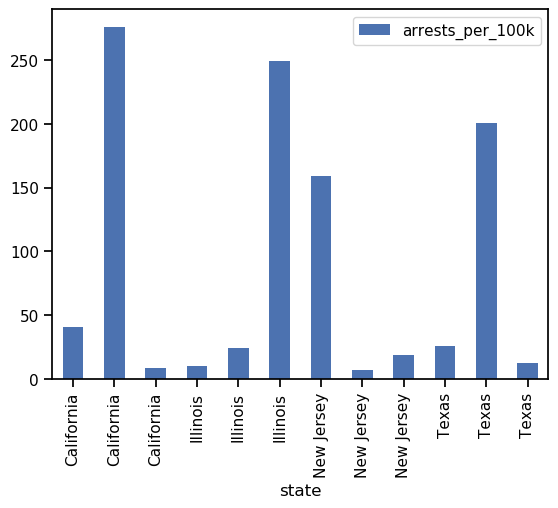

In [51]:
reset_aesthetics()

df_4.plot(kind='bar', x='state', y='arrests_per_100k');

We *could* create a [grouped bar chart with matplotlib](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py). But it's quicker to use Seaborn or Altair for this.

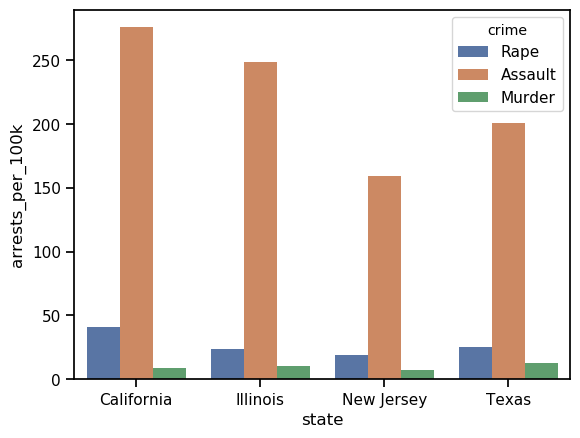

In [53]:
reset_aesthetics()

sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
);

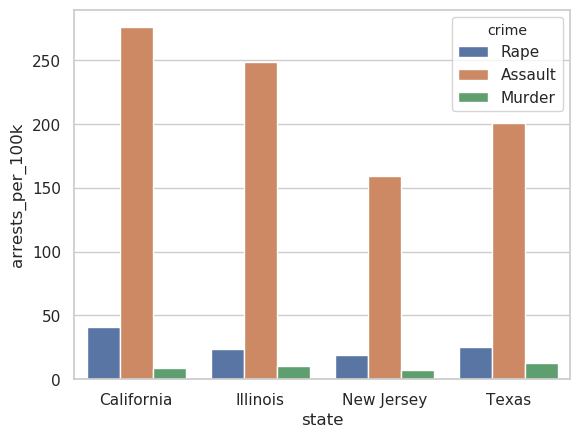

In [54]:
with sns.axes_style('whitegrid'):
    sns.barplot(
        data=df_4,
        x='state',
        y='arrests_per_100k',
        hue='crime',
    );

Let's make this bar chart a little better.

The ranking of bars should be respected. This is particularly important for horizontal bar charts.

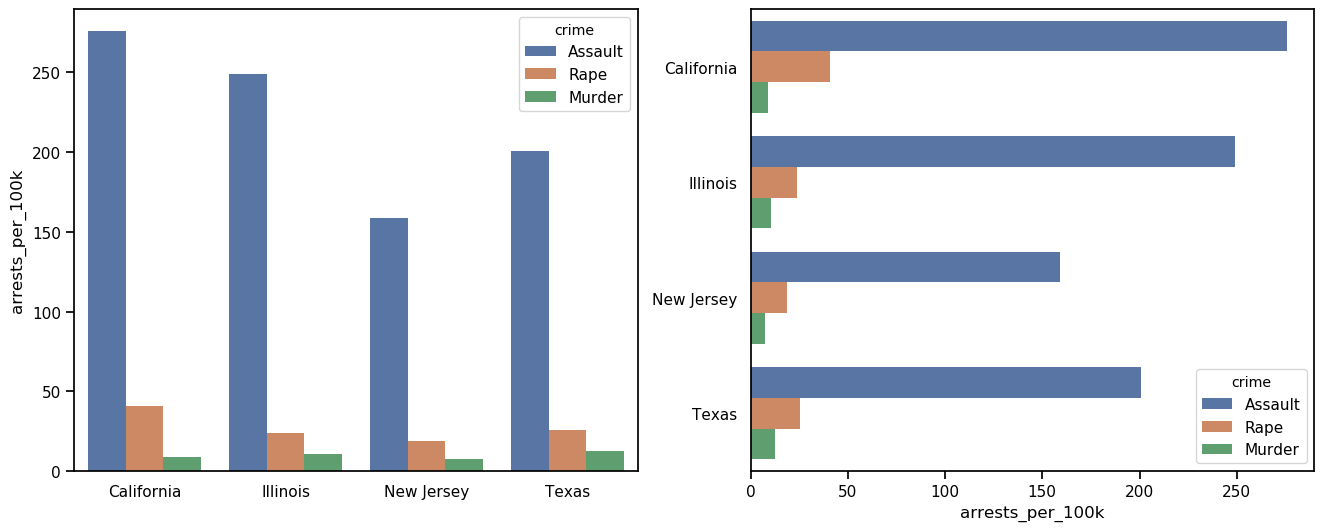

In [72]:
reset_aesthetics()

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# sns.scatterplot(x = model1.fittedvalues, y = model1.resid, ax=ax1)
sns.barplot(
    ax=ax0,
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
)
ax0.set(xlabel='')
ax0.tick_params(bottom=False, left=True)

sns.barplot(
    ax=ax1,
    data=df_4,
    x='arrests_per_100k',
    y='state',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    orient='h'
)
ax1.set(ylabel='')
ax1.tick_params(bottom=True, left=False)

Color can reveal patterns in the data if used effectively or hide those patterns if used poorly, so it's important to pick a good [color palette](https://seaborn.pydata.org/tutorial/color_palettes.html).

Seaborn has a function that can help us with that.

In this dataset `crime` has one of three types, so we pick a 3-color **qualitative color scale**.

In [23]:
# ?sns.choose_colorbrewer_palette

In [56]:
sns.choose_colorbrewer_palette(data_type='qualitative');

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

In [57]:
reset_aesthetics()

sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    palette='Dark2'
);

Make it bigger and use better labels.

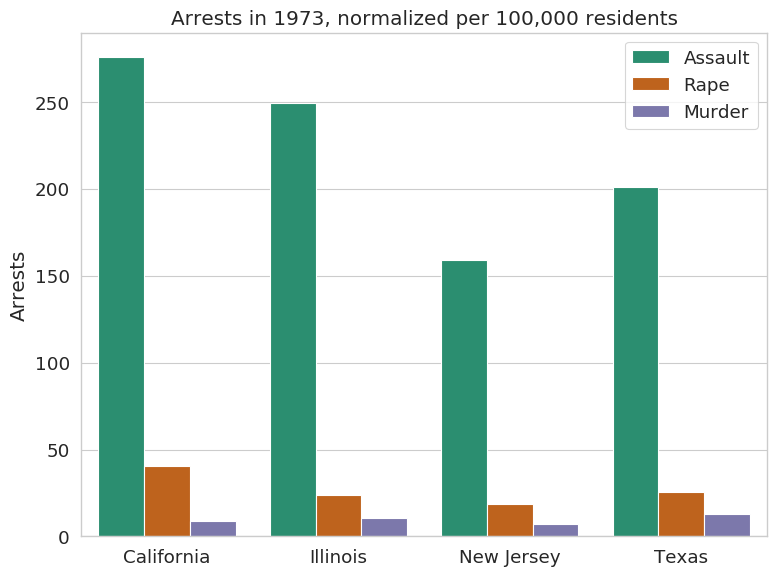

In [60]:
reset_aesthetics()

# Set Seaborn aesthetic parameters
# https://seaborn.pydata.org/generated/seaborn.set.html
sns.set(
    context='paper', # paper, notebook, talk, poster
    font_scale=1.5,
    style="whitegrid",
    rc={'font.weight': 'normal'}
)

fig = plt.figure(figsize=(8, 6))

barplot = sns.barplot(
    data=df_4,
    x='state',
    y='arrests_per_100k',
    hue='crime',
    hue_order=['Assault', 'Rape', 'Murder'],
    palette='Dark2',
)

barplot.set(
    xlabel='',
    ylabel='Arrests',
    title='Arrests in 1973, normalized per 100,000 residents',
)

# Somewhat hacky way to style the legend after it has been added to the plot.
barplot.get_legend().set(title='');

# shave off some margins with Matplotlib's tight_layout
plt.tight_layout()

# fig.savefig('arrests-in-1973.png') # jpg, png, svg

In [80]:
df = data('HairEyeColor')

print(df.shape)
df.sample(3)

(32, 4)


Hair    Eye     Sex  Freq
17  Black  Brown  Female    36
23    Red   Blue  Female     7
27    Red  Hazel  Female     7

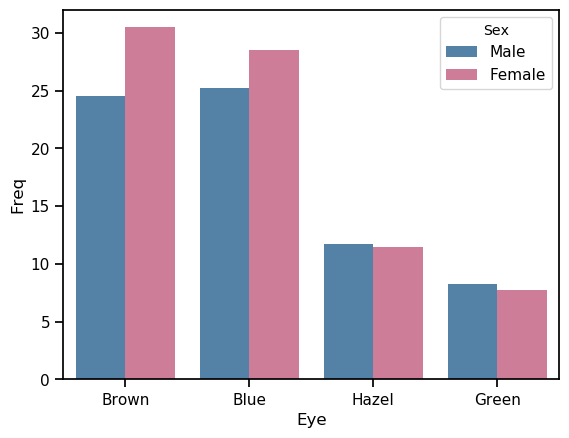

In [84]:
reset_aesthetics()

barplot = sns.barplot(
    data=df,
    x='Eye',
    y='Freq',
    hue='Sex',
    hue_order=['Male', 'Female'],
    palette=['steelblue', 'palevioletred'],
    ci=None, # confidence interval for error bars (not applicable to this dataset)
)

Using the same color let the viewer focus on the ranking of the data.

In [119]:
from vega_datasets import data as vega_data

df = vega_data.movies.url

alt.Chart(df).mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', title=''),
    y=alt.Y('Title:N', sort='-x', title=''),
    color=alt.Color('IMDB_Rating:Q', legend=None),
).transform_window(
    rank='rank(IMDB_Rating)',
    sort=[alt.SortField('IMDB_Rating', order='descending')],
).transform_filter(
    (alt.datum.rank < 10)
).properties(
    title='Top 10 movies by IMBD rating',
    height=300,
    width=600,
).configure_axis(
    labelFontSize=14,
).configure_title(
    fontSize=18,
)

alt.Chart(...)

In [177]:
# data('USArrests', show_doc=True)

In [120]:
df = data('USArrests')
df.sample(5)

Murder  Assault  UrbanPop  Rape
North Carolina    13.0      337        45  16.1
South Dakota       3.8       86        45  12.8
Mississippi       16.1      259        44  17.1
Oregon             4.9      159        67  29.3
New Hampshire      2.1       57        56   9.5

In [121]:
df.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [122]:
df.loc[df.index == 'Florida']

Murder  Assault  UrbanPop  Rape
Florida    15.4      335        80  31.9

In [123]:
df.sample(5)

Murder  Assault  UrbanPop  Rape
Missouri     9.0      178        70  28.2
Maryland    11.3      300        67  27.8
Florida     15.4      335        80  31.9
Wyoming      6.8      161        60  15.6
Iowa         2.2       56        57  11.3

In [124]:
# Seaborn has some issue with accepting the DataFrame index as a plot axis,
# so we create a new column. Otherwise we would need to do df.reset_index()
# when plotting this dataset.
df['state'] = df.index

df.sample(5)

Murder  Assault  UrbanPop  Rape           state
New Hampshire      2.1       57        56   9.5   New Hampshire
Mississippi       16.1      259        44  17.1     Mississippi
North Carolina    13.0      337        45  16.1  North Carolina
Georgia           17.4      211        60  25.8         Georgia
Indiana            7.2      113        65  21.0         Indiana

In [125]:
# This is not tidy data: let's create a new column 'Crime' which melt the Murder, Assault, Rape variables.

In [126]:
df_molten = df.melt(
    id_vars=['state'],
    value_vars=['Assault', 'Murder', 'Rape'],
    var_name='crime',
    value_name='arrests_per_100k'
)

In [127]:
df_molten.loc[df_molten['state'] == 'California']

state    crime  arrests_per_100k
4    California  Assault             276.0
54   California   Murder               9.0
104  California     Rape              40.6

In [128]:
df_molten.loc[df_molten['state'] == 'Florida']

state    crime  arrests_per_100k
8    Florida  Assault             335.0
58   Florida   Murder              15.4
108  Florida     Rape              31.9

In [129]:
murders = df_molten.loc[df_molten.crime == 'Murder']\
  .reset_index(drop=True)\
  .rename(columns={'arrests_per_100k': 'murders_per_100k'})\
  .sort_values(by=['state'])\
  .drop(columns=['crime', 'state'])

print(murders.shape)
murders.head()

(50, 1)


murders_per_100k
0              13.2
1              10.0
2               8.1
3               8.8
4               9.0

In [130]:
ddf = df_molten.groupby(by=['state'], as_index=False)\
  .sum()\
  .sort_values(by=['state'])

print(ddf.shape)
ddf.head()

(50, 2)


state  arrests_per_100k
0     Alabama             270.4
1      Alaska             317.5
2     Arizona             333.1
3    Arkansas             218.3
4  California             325.6

In [131]:
ddf = pd.concat([ddf, murders], axis=1).sort_values(by=['arrests_per_100k'], ascending=False)

ddf.head()

state  arrests_per_100k  murders_per_100k
8          Florida             382.3              15.4
32  North Carolina             366.1              13.0
19        Maryland             339.1              11.3
2          Arizona             333.1               8.1
30      New Mexico             328.5              11.4

In [134]:
reset_aesthetics()

# https://seaborn.pydata.org/examples/horizontal_barplot.html
fig, ax = plt.subplots(figsize=(6, 14))

sns.set(
    context='notebook', # paper, notebook, talk, poster
    font='sans-serif', # monospace, sans-serif
    font_scale=1.0,
    style='whitegrid',
    rc={'font.weight': 'normal'}
)

sns.barplot(
    x='arrests_per_100k',
    y='state',
    data=ddf,
    label='Total arrests',
    color='darkgrey',
    ci=None,
)

sns.barplot(
    x='murders_per_100k',
    y='state',
    data=ddf,
    label='Murders',
    color='orange',
    ci=None,
)

ax.set(
    title='Arrests per US state in 1973, per 100k residents (murders in orange)',
    xlabel='Arrests',
    ylabel='',
)

# Tick lines across the plot to help the viewer trace along the axis ticks.
# Make sure that the lines are light and small so they don't obscure the primary data lines.
ax.grid(True, which='major', axis='x', ls='--', lw=.5, c='k', alpha=.3)

# Tick marks don't add anything to this chart, so we remove them.
ax.tick_params(bottom=False, left=False)

sns.despine(left=True, bottom=True)

In [135]:
df_molten.sort_values(by=['arrests_per_100k'])

state    crime  arrests_per_100k
83    North Dakota   Murder               0.8
78   New Hampshire   Murder               2.1
68           Maine   Murder               2.1
64            Iowa   Murder               2.2
94         Vermont   Murder               2.2
..             ...      ...               ...
30      New Mexico  Assault             285.0
2          Arizona  Assault             294.0
19        Maryland  Assault             300.0
8          Florida  Assault             335.0
32  North Carolina  Assault             337.0

[150 rows x 3 columns]

In [136]:
# Because of a bug in Vega-Lite, we have to use a workaround to sort a layered chart
# https://github.com/altair-viz/altair/issues/820#issuecomment-386856394

sort = alt.SortField(field='arrests_per_100k', order='descending')

all_bars = alt.Chart(df_molten).mark_bar().encode(
    alt.X('arrests_per_100k'),
    y=alt.Y('state', sort=sort, axis=alt.Axis(labels=True, ticks=True, title='')),
    color=alt.value('darkgray'),
)

murder_bars = alt.Chart(df_molten).mark_bar().encode(
    x='arrests_per_100k',
    y=alt.Y('state', sort=sort, axis=alt.Axis(labels=False, ticks=False, title='')),
    color=alt.value('orange'),
).transform_filter(
    alt.datum.crime == 'Murder',
)

alt.layer(
    all_bars,
    murder_bars,
    data=df_molten
).resolve_scale(y='independent').resolve_axis(x='independent')

alt.LayerChart(...)

You can stack the bars to represent a [part-to-a-whole](https://datavizcatalogue.com/methods/stacked_bar_graph.html). In fact, the stacked bar chart is a good alternative to the pie chart.

In [201]:
# https://altair-viz.github.io/gallery/stacked_bar_chart.html
alt.Chart(df_molten).mark_bar().encode(
    x='sum(arrests_per_100k)',
    y=alt.Y(
        'state',
        axis=alt.Axis(title=''),
        sort=alt.SortField(field='arrests_per_100k', order='descending')
    ),
    color=alt.Color('crime', scale=alt.Scale(scheme='Dark2')),
)

alt.Chart(...)

In [137]:
from vega_datasets import data as vega_data

df = vega_data.barley()

alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(yield)', stack='normalize', title='Fraction of total yield'),
    y=alt.Y('variety', title='variety of barley'),
    color='site'
).properties(
    title='Yield from a Minnesota barley trial (in bushels per acre)',
    height=300,
    width=600,
).configure_axis(
    labelFontSize=16,
    titleFontSize=16,
).configure_title(
    fontSize=18,
)

alt.Chart(...)

Avoid 2-way horizontal bars: we perceive difference in length on a single direction.

This means no population pyramids like this:

In [146]:
from vega_datasets import data as vega_data

df = vega_data.population.url

slider = alt.binding_range(min=1850, max=2000, step=10)
select_year = alt.selection_single(
    name='year',
    fields=['year'],
    bind=slider,
    init={'year': 2000}
)

base = alt.Chart(df).add_selection(
    select_year
).transform_filter(
    select_year
).transform_calculate(
    gender=alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female')
).properties(
    width=250
)


color_scale = alt.Scale(
    domain=['Male', 'Female'],
    range=['#1f77b4', '#e377c2']
)

left = base.transform_filter(
    alt.datum.gender == 'Female'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X(
        'sum(people):Q',
        title='population',
        sort=alt.SortOrder('descending')
    ),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Female')

middle = base.encode(
    y=alt.Y('age:O', axis=None),
    text=alt.Text('age:Q'),
).mark_text().properties(width=20)

right = base.transform_filter(
    alt.datum.gender == 'Male'
).encode(
    y=alt.Y('age:O', axis=None),
    x=alt.X('sum(people):Q', title='population'),
    color=alt.Color('gender:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Male')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

Make a grouped bar chart instead:

In [174]:
from vega_datasets import data as vega_data

df = vega_data.population.url

pink_blue = alt.Scale(
    domain=('Male', 'Female'),
    range=['steelblue', 'salmon']
)

slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(
    name='year',
    fields=['year'],
    bind=slider,
    init={'year': 2000}
)

alt.Chart(df).mark_bar().encode(
    x=alt.X('sex:N', title=None),
    y=alt.Y('people:Q', scale=alt.Scale(domain=(0, 12000000))),
    color=alt.Color('sex:N', scale=pink_blue),
    column='age:O'
).properties(
    width=20
).add_selection(
    select_year
).transform_calculate('sex', alt.expr.if_(alt.datum.sex == 1, 'Male', 'Female')
).transform_filter(
    select_year
).configure_facet(
    spacing=8
)

alt.Chart(...)

In [175]:
df = vega_data.wheat()

base = alt.Chart(df).encode(x='year:O')

bar = base.mark_bar().encode(y='wheat:Q')

line =  base.mark_line(color='red').encode(
    y='wages:Q'
)

(bar + line).properties(width=600)

alt.LayerChart(...)

## Regression

In [155]:
df = data('trees')

print(df.shape)
df.head()

(31, 3)


Girth  Height  Volume
1    8.3      70    10.3
2    8.6      65    10.3
3    8.8      63    10.2
4   10.5      72    16.4
5   10.7      81    18.8

In [156]:
# Define the degree of the polynomial fits
degree_list = [1, 3, 5]

base = alt.Chart(df).mark_circle(color="black").encode(
        alt.X('Height'), alt.Y('Girth')
)

polynomial_fit = [
    base.transform_regression(
        'Height', 'Girth', method='poly', order=order, as_=['x', str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=['degree', 'y'])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)

In [157]:
# Generate some random data
rng = np.random.RandomState(1)
x = rng.rand(40) ** 2
y = 10 - 1.0 / (x + 0.1) + rng.randn(40)
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fits
degree_list = [1, 3, 5]

base = alt.Chart(source).mark_circle(color='black').encode(
        alt.X('x'), alt.Y('y')
)

polynomial_fit = [
    base.transform_regression(
        'x', 'y', method='poly', order=order, as_=['x', str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=['degree', 'y'])
    .encode(alt.Color('degree:N'))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)

## Scatter Plot <a name="scatterplot"></a>

[↑ Back to TOC](#toc)

A scatter plot displays the relationship between 2 numeric variables.

### Tips

- beware of overplotting in clusters of many data points

See [Datashader white paper](https://www.anaconda.com/wp-content/uploads/2019/03/big-data-visualization-with-datashader-whitepaper-1.pdf) for a discussion about overplotting, oversaturation, undersaturation, undersampling, and underutilized dynamic range.

To avoid plotting pitfalls (especially when dealing with large datasets), have a look at [this notebook](https://anaconda.org/jbednar/plotting_pitfalls/notebook) and [this article](https://www.data-to-viz.com/caveat/overplotting.html).

In [252]:
from vega_datasets import data as vega_data

alt.Chart(vega_data.cars.url).mark_point(size=75).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
).properties(
  width=600,
  height=600,
  title='Miles per Gallon vs Horsepower'
).configure_axis(
    labelFontSize=14,
    titleFontSize=18,
)

alt.Chart(...)

Scatterplot are sometimes plotted with the distributions of the 2 variables.

In [248]:
# data('tips', show_doc=True)
tips = data('tips')

# ?sns.jointplot

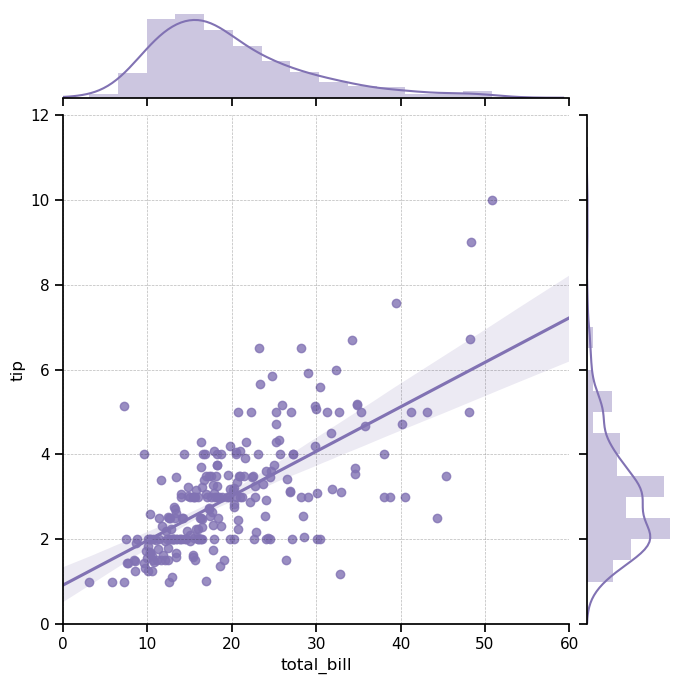

In [294]:
reset_aesthetics()

grid = sns.jointplot(
    x='total_bill',
    y='tip',
    data=tips,
    kind='reg',
    truncate=False,
    xlim=(0, 60),
    ylim=(0, 12),
    color='m',
    height=7
)

grid.ax_joint.grid(True, which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)

SPLOM: Scatter Plot Matrix. Use it to investigate relationships across quantitative variables.

In [250]:
from vega_datasets import data as vega_data

df = vega_data.iris()

df.head()

sepalLength  sepalWidth  petalLength  petalWidth species
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa

In [251]:
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='species:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'],
    column=['petalWidth', 'petalLength', 'sepalWidth', 'sepalLength']
).interactive()

alt.RepeatChart(...)

## Box plot & Violin plot <a name="box-plot"></a>

[↑ Back to TOC](#toc)

A box plot gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value, excluding outliers.

The violin plot is similar to a box plot, with the addition of a rotated kernel density plot on each side that allows a deeper understanding of the distribution of the data.

In [344]:
df = data('tips')

df.head()

total_bill   tip     sex smoker  day    time  size
1       16.99  1.01  Female     No  Sun  Dinner     2
2       10.34  1.66    Male     No  Sun  Dinner     3
3       21.01  3.50    Male     No  Sun  Dinner     3
4       23.68  3.31    Male     No  Sun  Dinner     2
5       24.59  3.61  Female     No  Sun  Dinner     4

In [367]:
reset_aesthetics()

fig = plt.figure(figsize=(8, 4))

ax = sns.boxplot(
    x='day',
    y='tip',
    hue='sex',
    data=df.sort_values(by=['day']),
    palette='Accent'
)

ax.grid(True, which='major', axis='y', ls='--', lw=.5, c='k', alpha=.3)

ax.tick_params(
    bottom=True,
    left=False,
)

ax.set(
    ylabel='Tip (in USD)',
    xlabel='',
    title='Tips received Thursday to Sunday, males vs females'
)

sns.despine(left=True, bottom=False)

In [368]:
reset_aesthetics()

sns.set(style='whitegrid')

fig = plt.figure(figsize=(8, 4))

ax = sns.violinplot(
    x='day',
    y='total_bill',
    hue='smoker',
    split=True,
    inner='quart',
    palette='Accent',
    data=df.sort_values(by=['day'])
)

ax.set(
    ylabel='Tip (in USD)',
    xlabel='',
    title='Tips received Thursday to Sunday, males vs females'
)

sns.despine(left=True)

## Histogram <a name="histogram"></a>

[↑ Back to TOC](#toc)

TODO parla della difficolta' di fare binning.

a histogram is not elemental, but is a combination of bars and binning.

The histogram is interesting for another reason: one of the aesthetics, the y-position,
is not present in the original data, but is the count computed from the binning statis-
tic.

In the ggplot2 this is specified as aes(y = ..count..). 

The two dots are
a visual indicator highlighting that variable is not present in the original data, but has
been computed by the statistic. There are other variables produced by the binning sta-
tistic that we might want to use instead, for example, aes(y = ..density..) or
aes(y = ..density../sum(..density..)). 

A less common mapping is
aes(y = ..count.. / max(..count..)), which creates a histogram with a
vertical range of [0, 1], useful for faceted and interactive graphics.

Fisher-Jensk per il binning
https://pbpython.com/natural-breaks.html

### Tips

- a

In [259]:
from vega_datasets import data as vega_data

alt.Chart(vega_data.movies.url).mark_bar().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    y='count()',
)

alt.Chart(...)

In [260]:
from vega_datasets import data as vega_data

base = alt.Chart(vega_data.movies.url)

bar = base.mark_bar().encode(
    x=alt.X('IMDB_Rating:Q', bin=True, axis=None),
    y='count()'
)

rule = base.mark_rule(color='red').encode(
    x='mean(IMDB_Rating):Q',
    size=alt.value(5)
)

bar + rule

alt.LayerChart(...)

## Grammar of Graphics <a name="grammar-of-graphics"></a>

[↑ Back to TOC](#toc)

In a language, a grammar is a **set of rules** that defines the structure and interpretation of sentences.

A grammar of graphics provides a **structure to combine graphical elements** into figures that display data in a meaningful way. With a grammar we can describe and construct a wide range of statistical graphics.

Proposed by Leland Wilkinson's [The Grammar of Graphics](https://www.goodreads.com/book/show/2549408.The_Grammar_of_Graphics) in 2000.

|<img src="https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/grammar-of-graphics.jpeg" alt="Leland Wilkinson, The Grammar of Graphics" title="Leland Wilkinson, The Grammar of Graphics" width="400" />|
|:--:|
| *Leland Wilkinson, The Grammar of Graphics* |

First implementation in [SYSTAT](https://en.wikipedia.org/wiki/SYSTAT_(software)) (developed by Wilkinson himself), then Java.

Hadley Wickham published [A Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.html) in 2010, then created the R package [ggplot2](https://www.rdocumentation.org/packages/ggplot2/versions/3.2.1).

The grammar of graphics separates a graphic into different layers. Each layer contains a piece of the graphic.

1. data
2. aestetics
3. scale
4. geometric objects
5. statistics
6. facets
7. coordinate system

ggplot2 allows you to create graphs that represent both univariate and multivariate numerical and categorical data in a straightforward manner. Grouping can be represented by color, symbol, size, and transparency. The creation of trellis plots (i.e., conditioning) is relatively simple.

Using the software engineering lingo, the grammar of graphics is a framework that enable us to concisely describe the components of any graphics.

[combine graphical primitives](https://github.com/rstudio/cheatsheets/blob/master/data-visualization-2.1.pdf)

| ![Layers in a grammar of graphics](https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/grammar-of-graphics-1.png "Each layer contains a piece of the graphic: geometric objects, scales and coordinate system, plot annotations.") |
|:--:|
| *Each layer contains a piece of the graphic: geometric objects, scales and coordinate system, plot annotations.* |

| ![The layers combined](https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/grammar-of-graphics-2.png "The layers combined in the final graphic.") | 
|:--:| 
| *The layers combined in the final graphic.* |

### Geom

Geometric objects, or geoms for short, control the type of plot that you create. In altair sono gli encoding `mark_line`, `mark_circle`, etc.

### Layer

Together, the data, mappings, statistical transformation, and geometric object form a layer.

But what is in a layer? Let’s think about an example. Say we have a dataset with an independent variable, x, and a dependent variable, y. If we perform a simple linear regression, we can also calculate the predicted values for y at specific values of x (we can call these predictions y’). Using these data, we want to make a scatterplot with a line of best fit. What are the elements of this plot?

To be precise, the layered grammar defines the components of a plot as:

- a default dataset and set of mappings from variables to aesthetics;
- one or more layers, with each layer having one geometric object, one statistical transformation, one position adjustment, and optionally, one dataset and set of aesthetic mappings;
- one scale for each aesthetic mapping used;
- a coordinate system;
- the facet specification.

Layers are responsible for creating the objects that we perceive on the plot. A layer is
composed of four parts:

- data and aesthetic mapping, a statistical transformation (stat);
- a geometric object (geom);
- a position adjustment.

A layer is the equivalent of Wilkinson’s ELEMENT , although the parameterization is
rather different. In Wilkinson’s grammar, all the parts of an element are intertwined, whereas in the layered grammar they are separate

We have:

- The data itself (x, y, and the best fit prediction, y’)
- Dots on the scatterplot representing the relationship between x and y
- The line representing the relationship between x and y’ (the line of best fit)
- The scaling of the data (linear)
- The coordinate system (Cartesian)

What if we want to make a histogram of the distribution of x? Then we have:

- The data itself (x)
- Bars representing the frequency of x at different values of x
- The scaling of the data (linear)
- The coordinate system (Cartesian)

### Facet

Faceting is a more general case of the techniques known
as conditioning, trellising, and latticing, and produces small multiples showing different subsets of the data. If we facet the previous plot by D we will get a plot that looks like Figure 3, where each value of D is displayed in a different panel.

### Scale

A scale controls the mapping from data to aesthetic attributes, and so we need one scale for each aesthetic property used in a layer. Scales are common across layers to ensure a consistent mapping from data to aesthetics.

Scales typically map from a single variable to a single aesthetic, but there are exceptions.
For example, we can map one variable to hue and another to saturation, to create a single
aesthetic, color. We can also create redundant mappings, mapping the same variable to
multiple aesthetics. This is particularly useful when producing a graphic that works in both
color and black and white.

The scale of the layered grammar is equivalent to the SCALE and GUIDE of Wilkinson’s
grammar. There are two types of guides: scale guides and annotation guides. In the lay-
ered grammar, the scale guides (axes and legends) are largely drawn automatically based
on options supplied to the relative scales. Annotation guides, used to highlight important
data points, are not needed because they can be constructed with creative use of geoms
if data dependent, or if not, the underlying drawing system can be used directly. Scales
are also computed somewhat differently as it is possible to map a variable produced by a
statistic to an aesthetic. This requires two passes of scaling, before and after the statistical transformation.

> The Vega and Vega-Lite specifications are perhaps the best existing candidates for a principled *lingua franca* of data visualization. - Altair team.

| [![Vega Lite: A Grammar of Interactive Graphics - Wongsuphasawat, Moritz, and Satyanarayan](https://raw.githubusercontent.com/jackdbd/python-firenze-meetup-2020-02-06/master/images/vega-lite-1.png)](https://www.youtube.com/watch?v=9uaHRWj04D4 "Vega Lite: A Grammar of Interactive Graphics - Wongsuphasawat, Moritz, and Satyanarayan") |
|:--:|
| *Vega Lite: A Grammar of Interactive Graphics - Wongsuphasawat, Moritz, and Satyanarayan* |

In [163]:
# iris = data('iris', show_doc=True)
iris = data('iris')

iris.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

In [164]:
reset_aesthetics()

g = sns.lmplot(
    x='Sepal.Length',
    y='Sepal.Width',
    hue='Species',
    height=5,
    data=iris,
)

g.set_axis_labels('Sepal length (mm)', 'Sepal width (mm)');

In [167]:
reset_aesthetics()

tips.total_bill.plot(kind='hist')

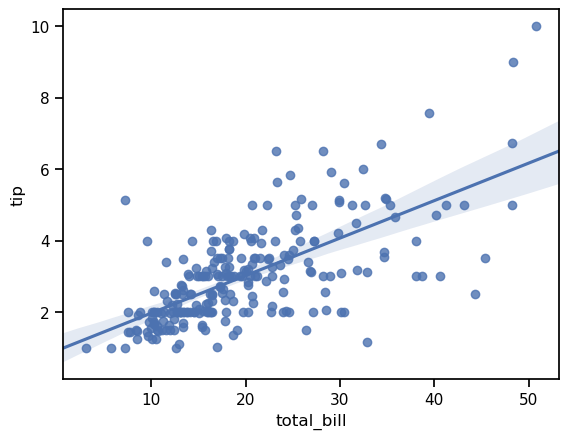

In [168]:
reset_aesthetics()

sns.regplot(x="total_bill", y="tip", data=tips);

Seaborn `relplot` can be used to combine a scatter plot with a FacetGrid.

In [295]:
reset_aesthetics()

grid = sns.relplot(
    x='total_bill',
    y='tip',
    col='time',
    hue='day',
    style='day',
    kind='scatter',
    data=tips,
)

# grid.savefig('./images/tips-seaborn-facet-grid.png')

## Just use SQL <a name="sql"></a>

[↑ Back to TOC](#toc)

What if you found a good dataset but you are not a Pandas wizard?

If the data come from a database, just use SQL (a bit odd-topic, but I absolutely recommend to read Steve Wozniak's article [What ORMs have taught me: just learn SQL](https://wozniak.ca/blog/2014/08/03/What-ORMs-have-taught-me-just-learn-SQL/)).

Let's see an example where we obtain a tidy dataset by using good-old SQL.

In [309]:
import os
import sqlalchemy as sa

In [311]:
ROOT = os.path.abspath(os.path.curdir)

# http://2016.padjo.org/tutorials/sqlite-data-starterpacks/
DB_NAME = 'sf-food-inspections-lives.sqlite'

DB_PATH = os.path.abspath(os.path.join(ROOT, 'data', DB_NAME))
PLOTS_PATH = os.path.abspath(os.path.join(ROOT, 'images'))
print(ROOT)
print(DB_PATH)
print(PLOTS_PATH)

/home/jack/repos/python-firenze-meetup-2020-02-06
/home/jack/repos/python-firenze-meetup-2020-02-06/data/sf-food-inspections-lives.sqlite
/home/jack/repos/python-firenze-meetup-2020-02-06/images


In [312]:
engine = sa.create_engine(f"sqlite:///{DB_PATH}")

In [313]:
# Altair raises a MaxRowsError exception when passing a dataset with more than 5000 rows.
ALTAIR_LIMIT = 5000
# The limit of 5000 rows can be disabled with this line
# https://altair-viz.github.io/user_guide/faq.html#maxrowserror-how-can-i-plot-large-datasets
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [314]:
# https://www.pythonsheets.com/notes/python-sqlalchemy.html
inspector = sa.inspect(engine)

print(inspector.get_table_names())

['inspection_records']


In [315]:
sql = '''
SELECT
  * FROM inspection_records AS t
LIMIT 5
'''

df = pd.read_sql(sql, con=engine)
df

business_id     business_name business_address  business_city  \
0           10  Tiramisu Kitchen    033 Belden Pl  San Francisco   
1           10  Tiramisu Kitchen    033 Belden Pl  San Francisco   
2           10  Tiramisu Kitchen    033 Belden Pl  San Francisco   
3           10  Tiramisu Kitchen    033 Belden Pl  San Francisco   
4           10  Tiramisu Kitchen    033 Belden Pl  San Francisco   

  business_state business_postal_code  business_latitude  business_longitude  \
0             CA                94104          37.791116         -122.403816   
1             CA                94104          37.791116         -122.403816   
2             CA                94104          37.791116         -122.403816   
3             CA                94104          37.791116         -122.403816   
4             CA                94104          37.791116         -122.403816   

  business_phone_number inspection_id inspection_date  inspection_score  \
0                  None   10_20140114      2014-01-14                92   
1                  None   10_20140114      2014-01-14                92   
2                  None   10_20140114      2014-01-14                92   
3                  None   10_20140729      2014-07-29                94   
4                  None   10_20140729      2014-07-29                94   

         inspection_type        violation_id  \
0  Routine - Unscheduled  10_20140114_103119   
1  Routine - Unscheduled  10_20140114_103145   
2  Routine - Unscheduled  10_20140114_103154   
3  Routine - Unscheduled  10_20140729_103144   
4  Routine - Unscheduled  10_20140729_103129   

                                violation_description  risk_category  
0  Inadequate and inaccessible handwashing facilities  Moderate Risk  
1    Improper storage of equipment utensils or linens       Low Risk  
2        Unclean or degraded floors walls or ceilings       Low Risk  
3    Unapproved or unmaintained equipment or utensils       Low Risk  
4             Insufficient hot water or running water  Moderate Risk

In [316]:
sql = '''
SELECT DISTINCT
  business_postal_code as zip_code
FROM inspection_records AS t
'''

df = pd.read_sql(sql, con=engine, parse_dates=True)
df = pd.read_sql(sql, con=engine) # use date(t.inspection_date) in the SQL query
df.shape

(44, 1)

In [317]:
df.zip_code.values

array(['94104', '94122', '94110', '94108', '94114', '94109', None,
       '94118', '94111', '94107', '94133', '94123', '94103', '94121',
       '94105', '94112', '94115', '94143', '94116', '94102', '94132',
       '94127', '94134', '94124', '94131', '94129', '94117', '94158',
       '94602', 'CA', '94120', '94013', '94014', '94130', '941033148',
       '00000', '95105', '94609', '94101', '92672', 'Ca', '94545',
       '94066', '94188'], dtype=object)

In [318]:
sql = '''
SELECT
  date(t.inspection_date) as inspection_date,
  t.business_postal_code as zip_code,
  t.business_latitude as latitude,
  t.business_longitude as longitude,
  t.inspection_score,
  COUNT(t.inspection_score) as num_inspections
FROM inspection_records AS t
WHERE
  inspection_score > 90
GROUP BY inspection_date
HAVING
  zip_code IN ('94104', '94122', '94110')
'''

df = pd.read_sql(sql, con=engine, parse_dates=True)
df = pd.read_sql(sql, con=engine) # use date(t.inspection_date) in the SQL query
df.shape

(135, 6)

In [319]:
df.head()

inspection_date zip_code   latitude   longitude  inspection_score  \
0      2013-11-08    94110  37.762217 -122.415035                94   
1      2013-11-12    94110  37.760487 -122.410662                94   
2      2013-11-16    94110        NaN         NaN               100   
3      2013-11-18    94104  37.792888 -122.403135                98   
4      2013-12-04    94110        NaN         NaN                94   

   num_inspections  
0               22  
1               27  
2                4  
3               22  
4                7

In [320]:
df.tail()

inspection_date zip_code   latitude   longitude  inspection_score  \
130      2016-09-19    94110  37.764484 -122.421815                96   
131      2016-09-21    94122  37.763524 -122.477510                94   
132      2016-10-04    94110        NaN         NaN               100   
133      2016-10-06    94122        NaN         NaN                93   
134      2016-10-11    94110        NaN         NaN                96   

     num_inspections  
130               26  
131               28  
132                4  
133               12  
134               53

In [321]:
df.isnull().sum()

inspection_date      0
zip_code             0
latitude            31
longitude           31
inspection_score     0
num_inspections      0
dtype: int64

## Geospatial <a name="geospatial"></a>

[↑ Back to TOC](#toc)

No map is an accurate representation of the real world. Each map adopts a specific **projection** and distorts reality in one way or another.

See [The True Size](https://thetruesize.com/#?borders=1~!MTY4OTQ5MDI.MjMwOTMwNw*Mjk4MTE0OTQ(NzY4MDYzNQ~!CONTIGUOUS_US*MTAwMjQwNzU.MjUwMjM1MTc(MTc1)MA~!IN*NTA2MjcyMw.OTA5NjI1Mw)MQ~!CN*OTkyMTY5Nw.NzMxNDcwNQ(MjI1)Mg).

A choropleth map displays divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable.

Altair have some support for choropleths and maps, but probably [Folium](https://github.com/python-visualization/folium) and [GeoViews](https://github.com/holoviz/geoviews) are better alternarnatives for geospatial data visualizations.

### Tips

- choropleths are cool, but easy to misinterpret
- always normalize the variable (e.g. you have to show a density of population and not a number of inhabitants that would be biased by the size of the area).

In [342]:
from vega_datasets import data as vega_data

source = alt.topo_feature(vega_data.world_110m.url, 'countries')

base = alt.Chart(source).mark_geoshape(
    fill='#666666',
    stroke='white'
).properties(
    width=400,
    height=400
)

projections = ['equirectangular', 'mercator', 'orthographic', 'gnomonic']
charts = [base.project(proj).properties(title=proj) for proj in projections]

alt.concat(*charts, columns=2)

alt.ConcatChart(...)

In [339]:
from vega_datasets import data as vega_data

counties = alt.topo_feature(vega_data.us_10m.url, 'counties')
source = vega_data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600,
    title='Unemployment rate in US counties'
).configure_title(fontSize=24)

alt.Chart(...)

In [324]:
# ZIP code 95101 is in San Jose, not in San Francisco
# https://zip-codes.cybo.com/united-states/95101_san-jose-california/
sql = '''
SELECT
  t.business_latitude AS latitude,
  t.business_longitude AS longitude,
  t.business_postal_code AS zip_code,
  t.inspection_type,
  t.risk_category,
  t.violation_description,
  date(t.inspection_date) AS date
FROM inspection_records AS t
WHERE
  business_latitude IS NOT NULL AND
  business_longitude IS NOT NULL AND
  zip_code NOT IN ('95101') AND
  date BETWEEN '2016-01-01' AND '2016-12-31'
LIMIT 10000
'''

df = pd.read_sql(sql, con=engine)

df.head()

latitude   longitude zip_code        inspection_type  risk_category  \
0  37.752439 -122.416250    94110  Routine - Unscheduled       Low Risk   
1  37.782888 -122.466101    94118  Routine - Unscheduled  Moderate Risk   
2  37.793338 -122.399583    94111  Routine - Unscheduled       Low Risk   
3  37.760423 -122.505209    94122  Routine - Unscheduled  Moderate Risk   
4  37.778382 -122.391151    94107  Routine - Unscheduled           None   

                          violation_description        date  
0                         Improper food storage  2016-01-14  
1              Moderate risk vermin infestation  2016-03-23  
2  Unclean or degraded floors walls or ceilings  2016-04-14  
3        Foods not protected from contamination  2016-03-30  
4                                          None  2016-08-14

In [325]:
df.zip_code.unique()

array(['94110', '94118', '94111', '94122', '94107', '94133', '94123',
       '94103', '94108', '94121', '94105', '94115', '94104', '94132',
       '94109', '94102', '94127', '94134', '94131', '94112', '94116',
       '94114', '94124', '94117', '94143', '94013', '95105', '94101',
       '94120', '00000', 'CA'], dtype=object)

In [327]:
# The routes.json file comes from here:
# https://github.com/swissnexSF/Urban-Data-Challenge/tree/master/public-transportation/san-francisco/geo/topojson
source = alt.topo_feature('./data/routes.json', 'routes')

sf_streets = alt.Chart(source).mark_geoshape(
    fill='none',
    opacity=0.15,
    stroke='black'
).project('mercator')

points = alt.Chart(df).transform_aggregate(
    latitude='mean(latitude)',
    longitude='mean(longitude)',
    count='count()',
    groupby=['zip_code']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.Size('count:Q', title='Inspections'),
    color=alt.Color('count:Q'),
    tooltip=['zip_code:N','count:Q']
)

alt.layer(
    sf_streets, 
    points,
).properties(
    width=800,
    height=600,
    title='Number of Food Inspections in San Francisco, 2016 (aggregated by ZIP code)'
)

alt.LayerChart(...)

### High risk vermin infestation in SF over the years

In [328]:
sql = sa.text('''
SELECT
  t.business_latitude AS latitude,
  t.business_longitude AS longitude,
  t.business_postal_code AS zip_code,
  t.violation_description,
  date(t.inspection_date) AS date
FROM inspection_records AS t
WHERE
  date BETWEEN :start_date AND :end_date AND
  business_latitude IS NOT NULL AND
  business_longitude IS NOT NULL AND
  zip_code NOT IN ('95101') AND
  violation_description LIKE '%High risk vermin%'
''')

In [329]:
df_vermin_2014 = pd.read_sql(
    sql,
    con=engine,
    params={'start_date': '2014-01-01', 'end_date': '2014-12-31'}
)

df_vermin_2014.head()

latitude   longitude zip_code         violation_description        date
0  37.741460 -122.422484    94110  High risk vermin infestation  2014-11-04
1  37.748855 -122.418134    94110  High risk vermin infestation  2014-03-03
2  37.748855 -122.418134    94110  High risk vermin infestation  2014-11-14
3  37.790947 -122.404026    94108  High risk vermin infestation  2014-04-09
4  37.776604 -122.414319    94103  High risk vermin infestation  2014-12-15

In [330]:
df_vermin_2015 = pd.read_sql(
    sql,
    con=engine,
    params={'start_date': '2015-01-01', 'end_date': '2015-12-31'}
)

df_vermin_2015.head()

latitude   longitude zip_code         violation_description        date
0  37.760954 -122.434935    94114  High risk vermin infestation  2015-05-18
1  37.759934 -122.423553    94110  High risk vermin infestation  2015-07-28
2  37.753691 -122.418657    94110  High risk vermin infestation  2015-02-24
3  37.790324 -122.420664    94109  High risk vermin infestation  2015-12-22
4  37.789073 -122.423784    94109  High risk vermin infestation  2015-10-19

In [331]:
df_vermin_2016 = pd.read_sql(
    sql,
    con=engine,
    params={'start_date': '2016-01-01', 'end_date': '2016-12-31'}
)

df_vermin_2016.head()

latitude   longitude zip_code         violation_description        date
0  37.781988 -122.486252    94121  High risk vermin infestation  2016-05-19
1  37.796973 -122.408504    94133  High risk vermin infestation  2016-04-12
2  37.753583 -122.490839    94122  High risk vermin infestation  2016-04-13
3  37.791116 -122.403816    94104  High risk vermin infestation  2016-05-03
4  37.763543 -122.476332    94122  High risk vermin infestation  2016-05-06

In [332]:
def make_layer_chart(x):
    points = alt.Chart(x['df']).mark_circle().encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        color=alt.value(x['color']),
        size=alt.value(50),
    )
    
    return alt.layer(
        sf_streets, 
        points,
    ).properties(
        width=800,
        height=600,
        title=x['title']
    )

In [333]:
years = [
    {'df': df_vermin_2014, 'color': '#1b9e77', 'title': '2014'},
    {'df': df_vermin_2015, 'color': '#d95f02', 'title': '2015'},
    {'df': df_vermin_2016, 'color': '#7570b3', 'title': '2016'},
]

charts = [make_layer_chart(x) for x in years]

In [334]:
alt.concat(*charts, columns=1).properties(title='High risk vermin infestation in SF, 2014-2016')

alt.ConcatChart(...)

In [335]:
# https://stackoverflow.com/questions/4428795/sqlite-convert-string-to-date
# https://www.w3resource.com/sqlite/core-functions-substr.php
sql = '''
SELECT
  cast(substr(t.inspection_date, 1, 4) AS decimal) AS year,
  substr(t.inspection_date, 6, 2) AS month,
  substr(t.inspection_date, 9, 2) AS day,
  t.business_latitude AS latitude,
  t.business_longitude AS longitude,
  t.business_postal_code AS zip_code,
  t.violation_description
FROM
  inspection_records AS t
WHERE
  business_latitude IS NOT NULL AND
  business_longitude IS NOT NULL AND
  zip_code NOT IN ('95101') AND
  violation_description LIKE '%High risk vermin%'
LIMIT 1000
'''
df = pd.read_sql(sql, con=engine)
df

year month day   latitude   longitude zip_code  \
0    2016    05  19  37.781988 -122.486252    94121   
1    2014    11  04  37.741460 -122.422484    94110   
2    2016    04  12  37.796973 -122.408504    94133   
3    2016    04  13  37.753583 -122.490839    94122   
4    2016    05  03  37.791116 -122.403816    94104   
..    ...   ...  ..        ...         ...      ...   
564  2014    05  28  37.775728 -122.497612    94121   
565  2014    06  26  37.800254 -122.410447    94133   
566  2015    01  27  37.726180 -122.403082    94134   
567  2014    12  04  37.801068 -122.409267    94133   
568  2014    08  05  37.805568 -122.421764    94109   

            violation_description  
0    High risk vermin infestation  
1    High risk vermin infestation  
2    High risk vermin infestation  
3    High risk vermin infestation  
4    High risk vermin infestation  
..                            ...  
564  High risk vermin infestation  
565  High risk vermin infestation  
566  High risk vermin infestation  
567  High risk vermin infestation  
568  High risk vermin infestation  

[569 rows x 7 columns]

In [336]:
df.year

0      2016
1      2014
2      2016
3      2016
4      2016
       ... 
564    2014
565    2014
566    2015
567    2014
568    2014
Name: year, Length: 569, dtype: int64

In [337]:
# The routes.json file comes from here:
# https://github.com/swissnexSF/Urban-Data-Challenge/tree/master/public-transportation/san-francisco/geo/topojson
source = alt.topo_feature('./data/routes.json', 'routes')

slider = alt.binding_range(min=2013, max=2016, step=1)
select_year = alt.selection_single(
    name='year', 
    fields=['year'],
    bind=slider,
    init={'year': 2013}
)

sf_streets = alt.Chart(source).mark_geoshape(
    fill='none',
    opacity=0.15,
    stroke='black'
).project('mercator')

points = alt.Chart(df).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.value('orangered'),
).add_selection(
    select_year
).transform_filter(
    select_year
)

text = alt.Chart(df).mark_text(
    align='left',
    x=80,
    y=150,
    fontSize=32,
    font='Monospace'
).encode(
    text='year:Q'
).transform_filter(
    select_year 
)

alt.layer(
    sf_streets, 
    points,
    text,
).properties(
    width=700,
    height=700,
    title='High risk vermin infestation in SF, 2013-2016',
).configure_title(
    fontSize=24,
    font='Monospace',
    anchor='start',
    color='black'
)

alt.LayerChart(...)

## Big Data <a name="big-data"></a>

[↑ Back to TOC](#toc)
    
- [pandas.read_gbq](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_gbq.html): load data from Google BigQuery.
- [HDF5 files, Datashader](https://github.com/jackdbd/hdf5-pydata-munich): notebook I presented at PyData Munich.
- [vaex](https://github.com/vaexio/vaex)